<a href="https://colab.research.google.com/github/ebatty/CodingBootcamp/blob/main/content/IndexingReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indexing Review

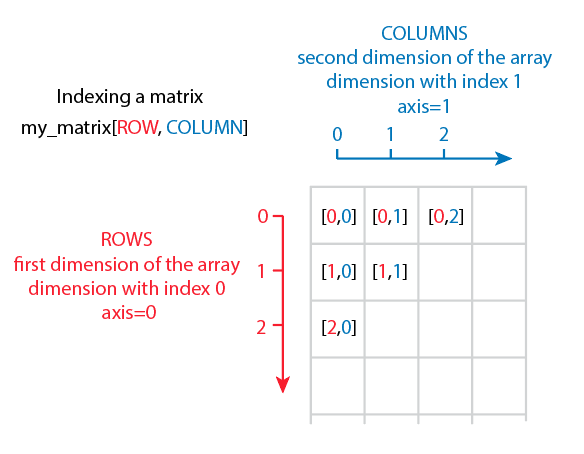

## Beyond 2 dimensions

We've been dealing only with 2d arrays, but arrays can be N dimensional.

For example, imagine that instead of analyzing a single image, you want to analyze a movie. You might store this data as a 3D array, where the first dimension is the rows of each image, the second dimension is the columns of each image, and the third dimension is each frame of the movie.

When you index into this, you would specify `my_movie[ROW,COLUMN,FRAME]`

Or if you wanted to get an entire frame of the movie: `this_frame = my_movie[:,:,FRAME]`

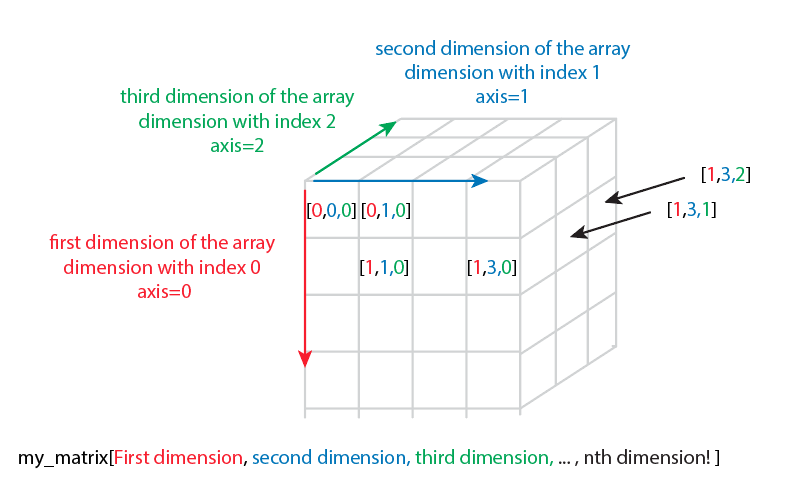

Imagine you want to take an average across all frames of the movie and get a single image (i.e. the average image of the movie). What would you put as your axis argument in `np.mean`?

## Practice indexing

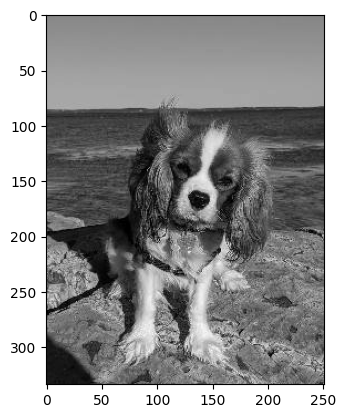

In [ ]:
import requests
import io
import matplotlib.pyplot as plt
import numpy as np

r = requests.get('https://osf.io/35azg/download')

img = plt.imread(io.BytesIO(r.content), format = 'jpg')

plt.imshow(img, cmap='gray')

Try to figure out what indices you would use to just isolate Leo's snout.

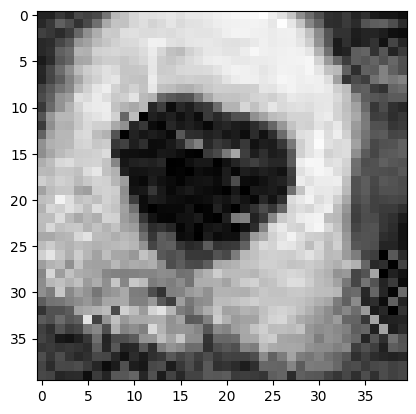

In [ ]:
# @markdown Click here to see the snout indices we chose
new_img = img.copy()

snout_img = new_img[150:190,120:160]

plt.imshow(snout_img, cmap='gray')

Now imagine we do some operation on the snout image, new_img should remain as is, right?

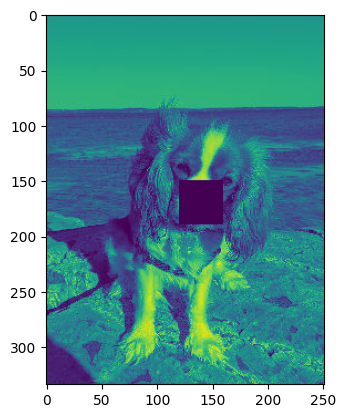

In [ ]:
snout_img[:,:] = 0

plt.imshow(new_img, cmap='gray')

New image has changed! Even though we didn't seem to touch it in the code. This is due to the fact that the default behavior when slicing numpy arrays is to return what's called a "view" into the original dataframe. So new_img and snout_img are actually referencing the same underlying data.

We can show that this goes the other way too, if we modify img, snout img will change too.

Text(0.5, 1.0, 'snout img')

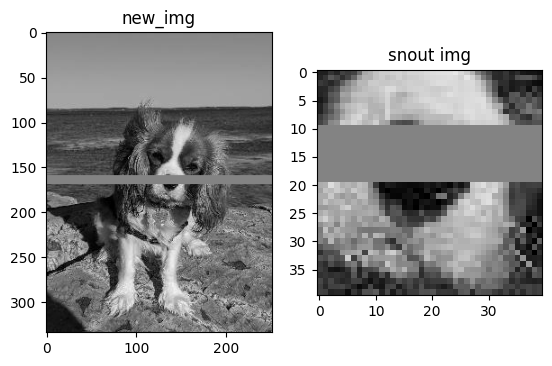

In [ ]:
# set the entire image to be the value of the sky

new_img[160:170,:] = new_img[0,0]

fig,axs = plt.subplots(1,2)
axs[0].imshow(new_img,vmin=0,vmax=255,cmap='gray')
axs[0].set_title('new_img')
axs[1].imshow(snout_img,vmin=0,vmax=255,cmap='gray')
axs[1].set_title('snout img')


So how to we get around this problem? Unless you are working with very large arrays where your computers memory is a constraint, it is always safer (especially as you are learning to code) to create copies.

We saw how to do this earlier with the .copy() method

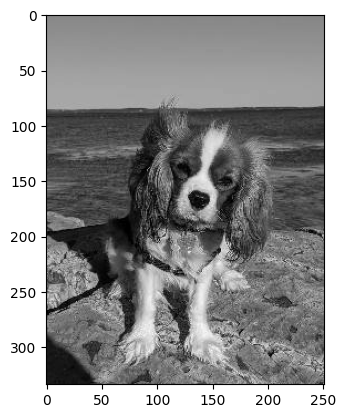

In [ ]:
new_img = img.copy()

snout_img = new_img[150:190,120:160].copy() ### ADDED COPY

snout_img[:,:] = 0

plt.imshow(new_img, cmap='gray') # new image is safe from being modified because snout img references a copy of the data now, not the original data!
